In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score

# Problem 2

In [2]:
#read data into a dataframe
zip_train = pd.read_csv('zip_train.txt', header=None, delimiter = ' ')

#ad hoc changes
zip_train.drop([257], axis = 1, inplace = True)
zip_train.rename({0 : 'digit'}, axis = 1, inplace = True)

#we only care about the digits 2 and 3
zip_train = zip_train[(zip_train['digit'] == 2.0) | (zip_train['digit'] == 3.0)]

In [3]:
#import the test data
zip_test = pd.read_csv('zip_test.txt', header = None, delimiter = ' ')
#rename the digit column
zip_test.rename({0 : 'digit'}, axis = 1, inplace = True)
#filter out everything but 2 and 3
zip_test = zip_test[(zip_test['digit'] == 2.0) | (zip_test['digit'] == 3.0)]

In [4]:
#create a training x and y
train_x = zip_train.drop('digit', axis = 1)
train_y = zip_train['digit'].astype(int)

#create a testing x and y
test_x = zip_test.drop('digit', axis = 1)
test_y = zip_test['digit'].astype(int)

Linear Regression

In [5]:
#create a linear regression object
regr = linear_model.LogisticRegression()

In [6]:
#train the model
regr.fit(train_x, train_y)

/Users/AngelaBeckham/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
#calculate the train and test error for the linear model
lm_train_error = 1 - regr.score(train_x, train_y)
lm_test_error = 1 - regr.score(test_x, test_y)

K - Nearest Neighbors

In [8]:
k_vals = [1, 3, 5, 7, 15]
#create a dictionary to hold error data
k_error = {'k_vals' : k_vals,
          'train_error': [],
          'test_error': []}

In [9]:
for k in k_vals:
    klass =  neighbors.KNeighborsClassifier(n_neighbors= k)
    klass.fit(train_x, train_y)
    #calculate training data error and append it to dictionary
    k_error['train_error'].append(1 - klass.score(train_x, train_y))
    #calculate test data error and append it to dictionary
    k_error['test_error'].append(1 - klass.score(test_x, test_y))

In [10]:
#convert the error dictionary into a dataframe so that it is easier to graph
error_data = pd.DataFrame(k_error)
error_data.rename({'k_vals' : 'k'}, axis = 1, inplace = True)
error_data.set_index('k', inplace = True)

Model Comparison

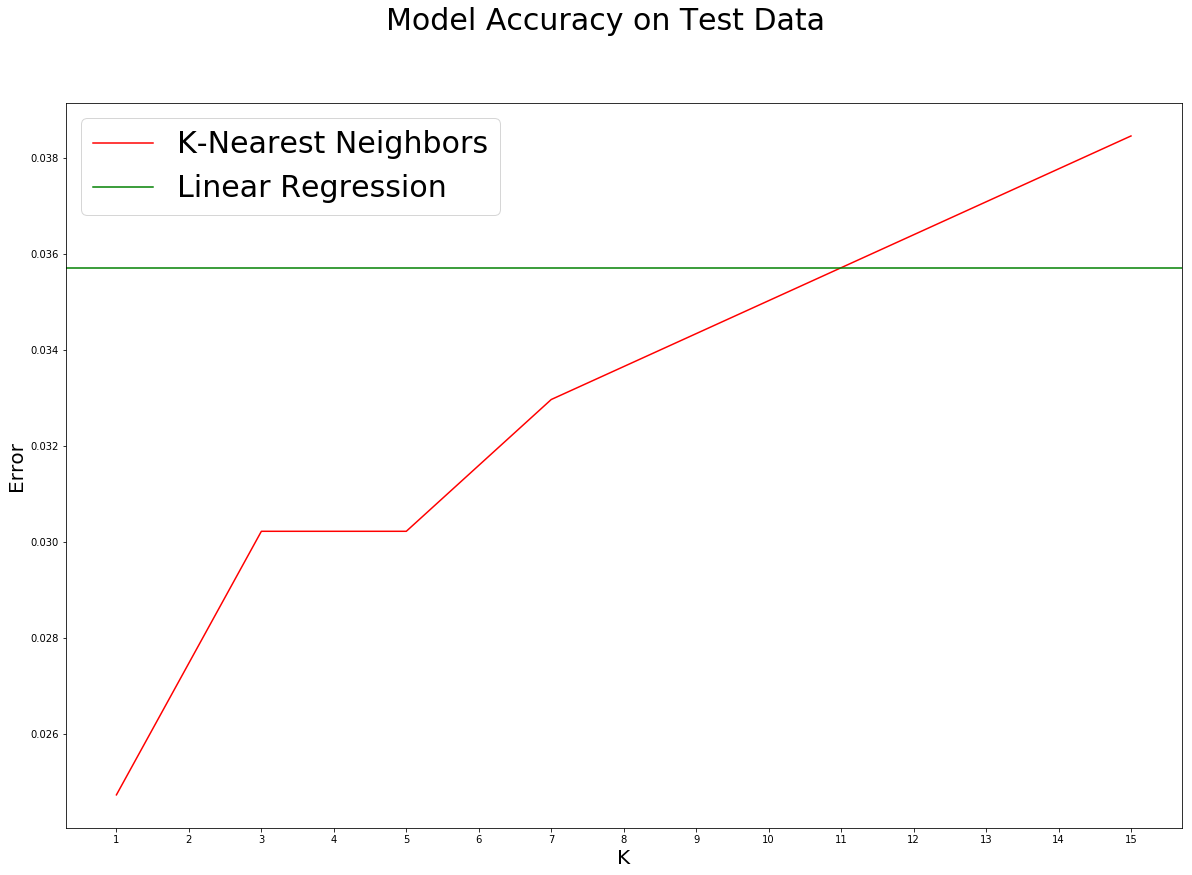

In [11]:
#create a figure comparing model accuracy on test data
test_fig = plt.figure(num = 1, figsize = [20, 13.333])
test_fig.suptitle('Model Accuracy on Test Data', fontsize = 30)
k_err, = plt.plot(error_data.index, error_data['test_error'], label = 'K-Nearest Neighbors', color = 'red')
lin_err = plt.axhline(lm_test_error, label = 'Linear Model', color = 'green')
plt.legend([k_err, lin_err], ['K-Nearest Neighbors', 'Linear Regression'], prop={'size': 30})
plt.xlabel('K', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.xticks(np.arange(1.0, 16, 1))
plt.show()

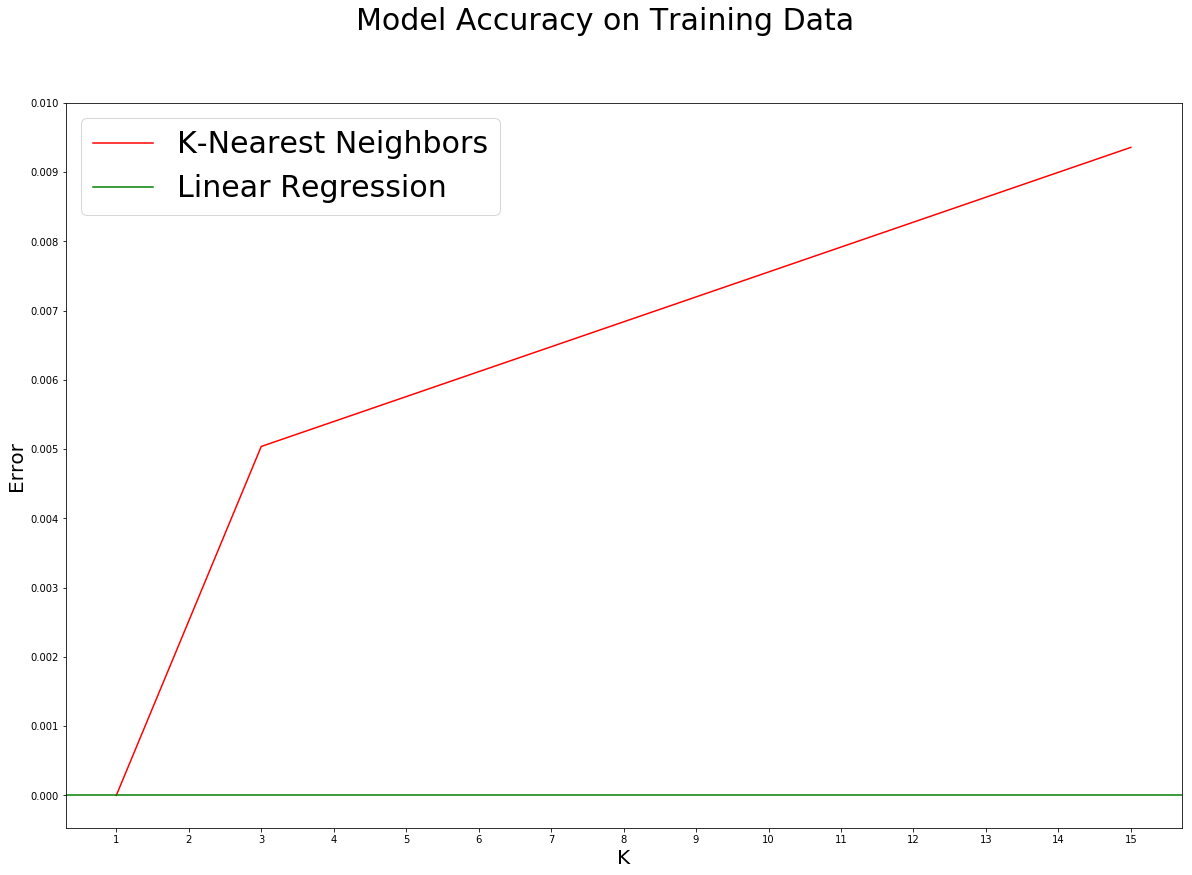

In [12]:
#create a figure comparing model accuracy on training data
train_fig = plt.figure(num = 2, figsize = [20, 13.333])
train_fig.suptitle('Model Accuracy on Training Data', fontsize = 30)
k_err, = plt.plot(error_data.index, error_data['train_error'], label = 'K-Nearest Neighbors', color = 'red')
lin_err = plt.axhline(lm_train_error, label = 'Linear Model', color = 'green')
plt.legend([k_err, lin_err], ['K-Nearest Neighbors', 'Linear Regression'], prop={'size': 30})
plt.xlabel('K', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.xticks(np.arange(1.0, 16, 1))
plt.yticks(np.arange(0.0, .011, .001))
plt.show()

# Question 6

In [30]:
def f1(x):
    return x[0] + x[1] + x[2]
def f2(x):
    return .5*(pow(x[0] + x[1] + x[2] + 1, 3))

In [31]:
#Calculate the expected prediction error
def epe(preds, vals): 
    try:
        if preds.size == vals.size:
            (preds - vals)**2
    except: 
        return pow(preds - vals, 2)

In [32]:
N = 500
k = [1, 2]
p_vals = np.arange(3, 11)
y1_sol = 1
y2_sol = 4

Y1 Model Comparison

In [46]:
#create a dictionary to hold error data
y1_dict = {'p' : p_vals, 'lin' : []}
for num in k:
    y1_dict[num] = []

In [47]:
for p in p_vals:
    
    #create the test data array
    test_x = np.zeros(p)
    test_x = test_x.reshape(1, -1)
    test_x[0, 0] = 1
    
    #create a dictionary to hold error values
    error_dict = {'lin' : [],
                 1 : [],
                 2 : []}
    for n in range(500):
        x_matrix = np.random.uniform(low = 0, high = 1, size = (N, p))
        y1 = np.fromiter((f1(x) + (np.random.normal(0, 1)) for x in x_matrix), dtype = float)

        #create a linear regression object
        regr1 = linear_model.LinearRegression()
        #train the model
        regr1.fit(x_matrix, y1)
        #make a prediction based on test data
        y1_pred = regr1.predict(test_x)
        #calculate error and append it to data dictionary
        #this should be a single value
        error_dict['lin'].append(pow(y1_pred - y1_sol, 2))

        for num in k:
            #create a k-nearest-neighbors object
            klass1 =  neighbors.KNeighborsRegressor(n_neighbors= num)
            #fir the model
            klass1.fit(x_matrix, y1)
            k_pred = klass1.predict(test_x)
            error_dict[num].append(pow(k_pred - y1_sol, 2))
    y1_dict['lin'].append(np.mean(np.array(error_dict['lin'])))
    y1_dict[1].append(np.mean(np.array(error_dict[1])))
    y1_dict[2].append(np.mean(np.array(error_dict[2])))

In [48]:
#convert the dictionary into a dataframe so that it can be more easily graphed
error_data = pd.DataFrame(y1_dict)
error_data.set_index('p', inplace = True)
error_data['error_ratio_1'] = error_data[1]/error_data['lin']
error_data['error_ratio_2'] = error_data[2]/error_data['lin']

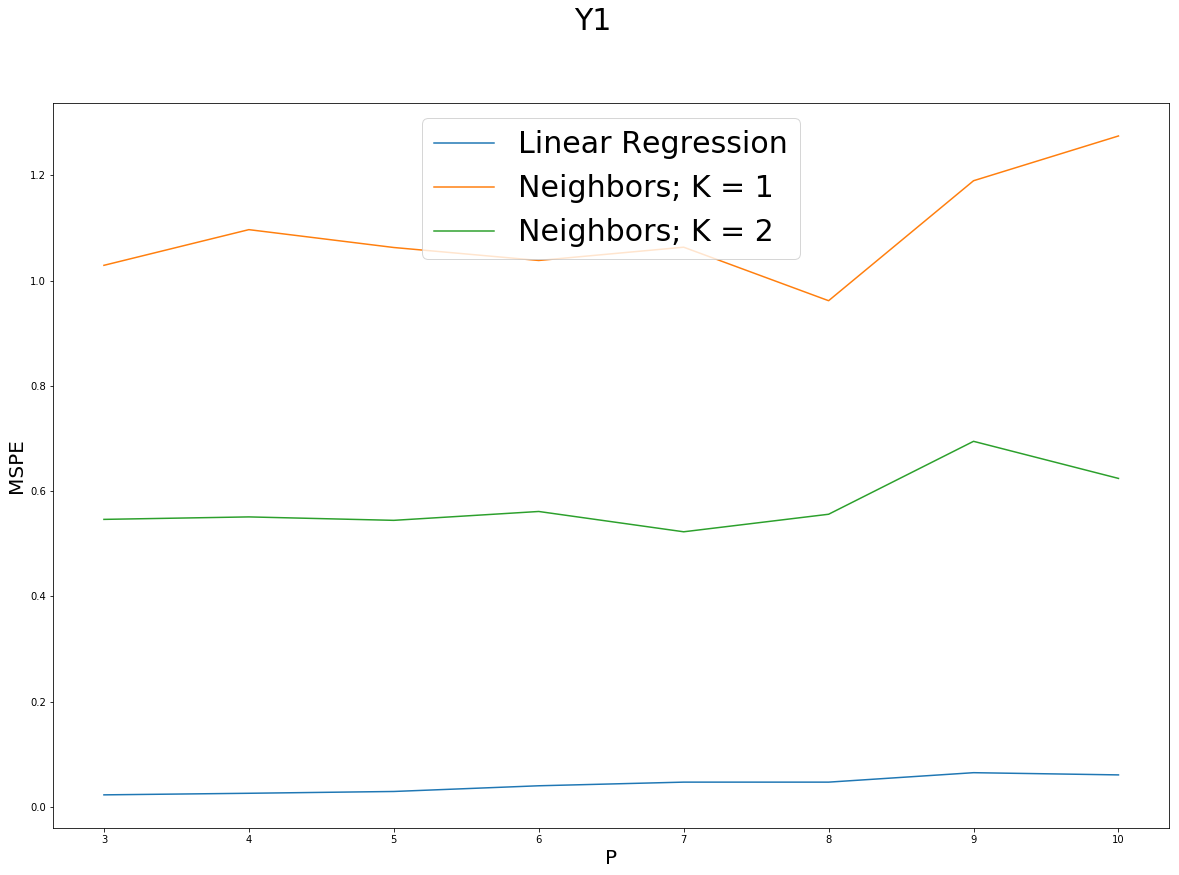

In [49]:
fig1 = plt.figure(num = 1, figsize = [20, 13.333])
fig1.suptitle('Y1', fontsize = 30)
lin, = plt.plot(error_data.index, error_data['lin'], label = 'Linear Regression')
k1, = plt.plot(error_data.index, error_data[1], label = 'Neighbors; K = 1')
k2, = plt.plot(error_data.index, error_data[2], label = 'Neighbors; K = 2')
plt.xlabel('P', fontsize = 20)
plt.ylabel('MSPE', fontsize = 20)
plt.legend([lin, k1, k2], ['Linear Regression', 'Neighbors; K = 1', 'Neighbors; K = 2'], prop={'size': 30})
plt.show()

#as the dimension increases, the 
# look for ratio of orange over blue
# look for ratio of green over blue

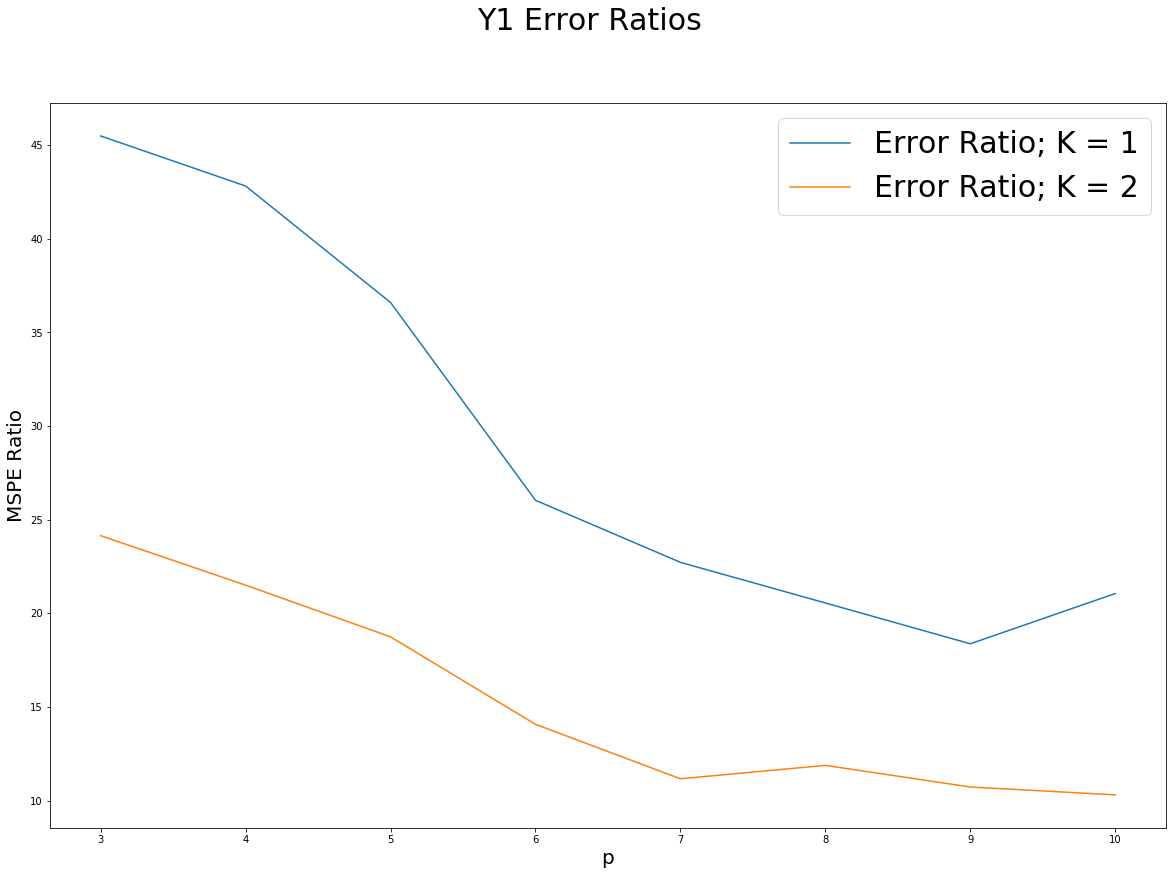

In [51]:
#this graph should look similar to the graph on p
fig1 = plt.figure(num = 2, figsize = [20, 13.333])
fig1.suptitle('Y1 Error Ratios', fontsize = 30)
k1, = plt.plot(error_data.index, error_data['error_ratio_1'], label = 'Error Ratio; K = 1')
k2, = plt.plot(error_data.index, error_data['error_ratio_2'], label = 'Error Ratio; K = 2')
plt.xlabel('p', fontsize = 20)
plt.ylabel('MSPE Ratio', fontsize = 20)
plt.legend(prop={'size': 30})
plt.show()

Y2 Model Comparison

In [73]:
#create a dictionary to hold error data
y2_dict = {'p' : p_vals, 'lin' : []}
for num in k:
    y2_dict[num] = []
    
    
for p in p_vals:
    #create the test data array
    test_x = np.zeros(p)
    test_x = test_x.reshape(1, -1)
    test_x[0, 0] = 1
    
    #create a dictionary to hold error values
    error_dict = {'lin' : [],
                 1 : [],
                 2 : []}
    
    
    for n in range(500):
        x_matrix = np.random.uniform(low = 0, high = 1, size = (N, p))
        y2 = np.fromiter((f2(x) + (np.random.normal(0, 1)) for x in x_matrix), dtype = float)
        
        #create a linear regression object
        regr2 = linear_model.LinearRegression()
        #train the model
        regr2.fit(x_matrix, y2)
        #make a prediction based on test data
        y2_pred = regr2.predict(test_x)
        #calculate error and append it to data dictionary
        error_dict['lin'].append(pow(y2_pred - y2_sol, 2))
        
        for num in k:
            #create a k-nearest-neighbors object
            klass2 =  neighbors.KNeighborsRegressor(n_neighbors= num)
            #fir the model
            klass2.fit(x_matrix, y2)
            k_pred = klass2.predict(test_x)
            error_dict[num].append(pow(k_pred - y2_sol, 2))
    
    y2_dict['lin'].append(np.mean(np.array(error_dict['lin'])))
    y2_dict[1].append(np.mean(np.array(error_dict[1])))
    y2_dict[2].append(np.mean(np.array(error_dict[2])))

In [74]:
k

[1, 2]

In [75]:
#convert the dictionary into a dataframe so that it can be more easily graphed
error_data2 = pd.DataFrame(y2_dict)
error_data2.set_index('p', inplace = True)
error_data2['error_ratio_1'] = error_data2[1]/error_data['lin']
error_data2['error_ratio_2'] = error_data2[2]/error_data['lin']

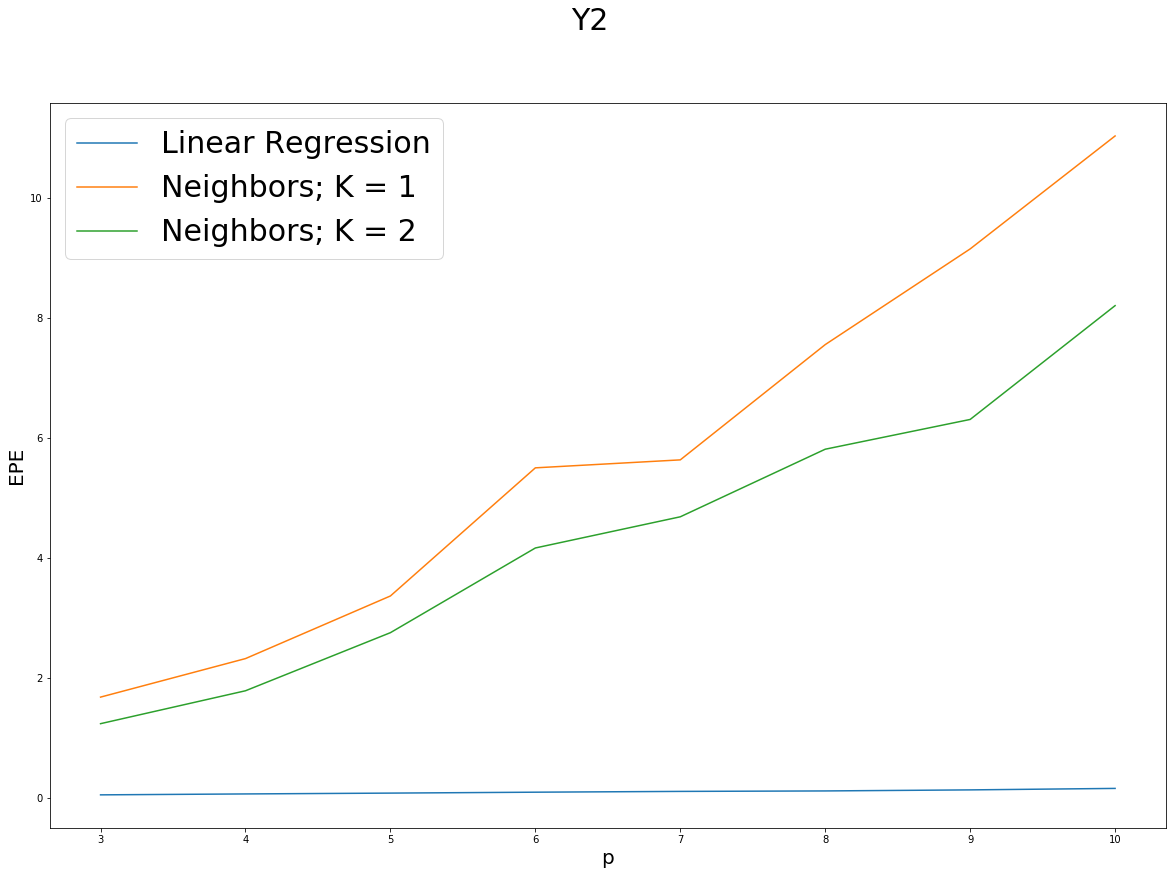

In [76]:
fig1 = plt.figure(num = 3, figsize = [20, 13.333])
fig1.suptitle('Y2', fontsize = 30)
lin, = plt.plot(error_data2.index, error_data2['lin'], label = 'Linear Regression')
k1, = plt.plot(error_data2.index, error_data2[1], label = 'Neighbors; K = 1')
k2, = plt.plot(error_data2.index, error_data2[2], label = 'Neighbors; K = 2')
plt.xlabel('p', fontsize = 20)
plt.ylabel('EPE', fontsize = 20)
plt.legend(prop={'size': 30})
plt.show()

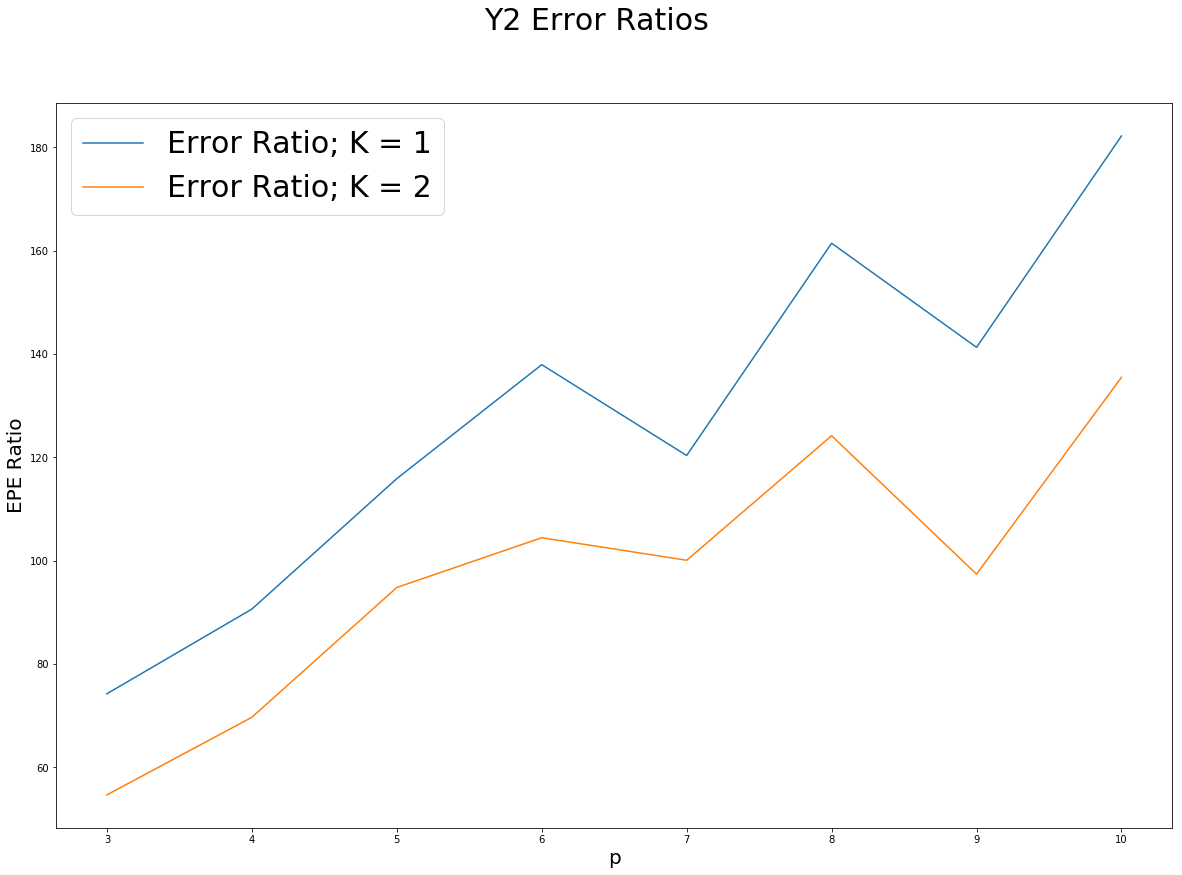

In [77]:
#this graph should look similar to the graph on p
fig2 = plt.figure(num = 4, figsize = [20, 13.333])
fig2.suptitle('Y2 Error Ratios', fontsize = 30)
k1, = plt.plot(error_data2.index, error_data2['error_ratio_1'], label = 'Error Ratio; K = 1')
k2, = plt.plot(error_data2.index, error_data2['error_ratio_2'], label = 'Error Ratio; K = 2')
plt.xlabel('p', fontsize = 20)
plt.ylabel('EPE Ratio', fontsize = 20)
plt.legend(prop={'size': 30})
plt.show()

# Question 7

In [110]:
def f(x, c):
    return np.exp(-c*pow(np.linalg.norm(x), 2))

In [111]:
def bias(preds, sols):
    try:
        if preds.size == sols.size:
            total = 0
            for i in range(preds.size):
                total += preds[0] - sols[0]
            return total/preds.size,
    except:
        return preds - sols,

In [112]:
def var(preds):
    try:
        total = 0
        mean = np.mean(preds)
        for i in range(preds.size):
            total += pow(preds[0] - mean, 2)
        return total/preds.size,
    except:
        return np.random.uniform(),

In [113]:
#define constants
c = 4
p_vals = [1, 3, 5, 7, 10, 15]
k = 1
y_sol = 1

In [114]:
def mspe2(pred, sol):
    if pred.size == sol.size:
        diff = sol - pred
        sqr = np.square(diff)
        return np.mean(sqr)
    else:
        return np.NaN

In [115]:
def mspe(bia, variance):
    return pow(bia, 2) + variance   

In [117]:
#create a dictionary that holds error data
error_dict = {'p' : p_vals,
              'error1' : [],
              'error2' : [],
              'bias' : [],
              'variance' : [],
             'distance' : []}

for p in p_vals:
    
    #the test data is x0 = (0, 0, 0, 0, ...)
    #the test y is 1
    #calculate the error based on these numbers
    train_x = np.random.uniform(low = 0, high = 1, size = (50, p))
    train_y = np.fromiter((f(x, c) for x in train_x), dtype = float)
    
    test_x  = np.zeros(shape = [1, p])
    
    klass = neighbors.KNeighborsRegressor(n_neighbors= 1)
    klass.fit(train_x, train_y)
    preds = klass.predict(test_x)
    
    #if we calculate this based on the training data and only the training data, we will get 0
    variance = var(preds)[0]
    bia = bias(preds, y_sol)[0]
    error_dict['variance'].append(variance)
    error_dict['bias'].append(bia)
    error_dict['distance'].append(np.mean(klass.kneighbors()[0]))
    error_dict['error1'].append(mspe(bia, variance))
    error_dict['error2'].append(mspe2(preds, np.array([y_sol])))

In [118]:
error_data = pd.DataFrame(error_dict)
error_data.set_index('p', inplace = True)
error_dict['bias^2'] = np.square(error_dict['bias'])

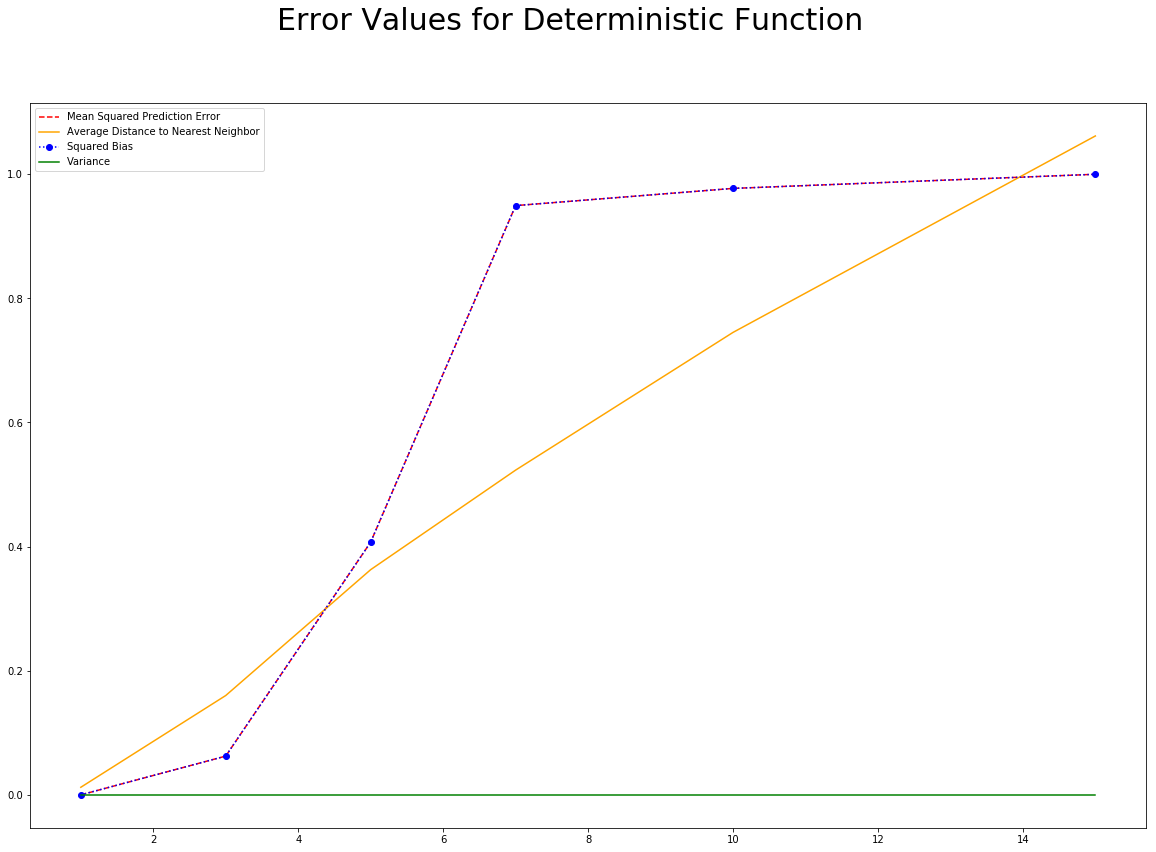

In [125]:
#in this graph it should show that variance + bias^2 = MSPE
fig7 = plt.figure(num = 7, figsize = [20, 13.333])
fig7.suptitle('Error Values for Deterministic Function', fontsize = 30)
mspe, = plt.plot(error_dict['p'], error_dict['error2'], label = 'Mean Squared Prediction Error', linestyle = 'dashed', color = 'red')
dist, = plt.plot(error_dict['p'], error_dict['distance'], label = 'Average Distance to Nearest Neighbor', color = 'orange')
bias, = plt.plot(error_dict['p'], error_dict['bias^2'], label = 'Squared Bias', linestyle = 'dotted', marker = 'o', color = 'blue')
var,  = plt.plot(error_dict['p'], error_dict['variance'], label = 'Variance', color = 'green')
plt.legend(prop={'size': 10})
plt.show()